<a href="https://colab.research.google.com/github/AshishShinde03/ML/blob/main/ADS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import yfinance as yf
from datetime import*
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm

In [2]:
ticker = 'panw'
start = '1926-07-01'
end = '2023-01-31'

In [3]:
df_pawn = yf.download(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
df_pawn = df_pawn.reset_index(0).reset_index(drop=True)

In [6]:
ff_data = pd.read_csv(r'https://raw.githubusercontent.com/AshishShinde03/ML/main/F-F_Research_Data_Factors_daily.CSV')

In [7]:
ff_data

,SrNo,Mkt-RF,SMB,HML,RF
0,19260701,0.10,-0.25,-0.27,0.009
1,19260702,0.45,-0.33,-0.06,0.009
2,19260706,0.17,0.30,-0.39,0.009
3,19260707,0.09,-0.58,0.02,0.009
4,19260708,0.21,-0.38,0.19,0.009
...,...,...,...,...,...
25414,20230125,0.00,-0.04,0.65,0.017
25415,20230126,1.08,-0.58,0.01,0.017
25416,20230127,0.36,0.62,-1.16,0.017
25417,20230130,-1.38,-0.10,0.72,0.017


In [10]:
ff_data['Date'] = pd.to_datetime(ff_data['SrNo'], format='%Y%m%d')

In [11]:
ff_data = ff_data.set_index('Date')

In [12]:
start_date = pd.to_datetime('2012-07-20')
end_date = pd.to_datetime('2023-01-30')
ff_data = ff_data[(ff_data.index >= start_date) & (ff_data.index <= end_date)]

In [13]:
ff_data = ff_data.drop([ 'Date1'], axis=1)

In [14]:
ff_data


,SrNo,Mkt-RF,SMB,HML,RF
Date,,,,,
2012-07-20,20120720,-1.06,-0.36,0.08,0.000
2012-07-23,20120723,-1.02,-0.68,0.19,0.000
2012-07-24,20120724,-0.99,-0.57,0.30,0.000
2012-07-25,20120725,-0.01,0.27,0.00,0.000
2012-07-26,20120726,1.53,-0.89,0.34,0.000
...,...,...,...,...,...
2023-01-24,20230124,-0.16,-0.23,0.19,0.017
2023-01-25,20230125,0.00,-0.04,0.65,0.017
2023-01-26,20230126,1.08,-0.58,0.01,0.017


In [15]:
merged_df = pd.merge(ff_data, df_pawn, on='Date', how='inner')

In [16]:
merged_df

,Date,SrNo,Mkt-RF,SMB,HML,RF,index,Open,High,Low,Close,Adj Close,Volume
0,2012-07-20,20120720,-1.06,-0.36,0.08,0.000,0,18.383333,20.690001,17.700001,17.709999,17.709999,21048300
1,2012-07-23,20120723,-1.02,-0.68,0.19,0.000,1,17.533333,18.000000,17.033333,17.170000,17.170000,2365200
2,2012-07-24,20120724,-0.99,-0.57,0.30,0.000,2,17.333332,18.666668,17.173332,18.500000,18.500000,2150400
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,3,18.833332,19.666668,18.433332,19.650000,19.650000,1799100
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,4,19.926666,20.616667,19.360001,19.959999,19.959999,1283400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,2644,150.809998,152.160004,149.389999,151.139999,151.139999,5180500
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,2645,148.000000,152.190002,146.949997,151.779999,151.779999,6491500
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,2646,154.779999,159.979996,153.679993,159.110001,159.110001,6782500
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,2647,158.000000,161.229996,157.600006,159.779999,159.779999,4171700


In [17]:
ADS_DF = pd.read_csv(r'https://raw.githubusercontent.com/AshishShinde03/DataSet_MLFin/main/ADS.csv')

In [18]:
ADS_DF

,Date,ADS_Index
0,1960:03:01,-0.580320
1,1960:03:02,-0.627497
2,1960:03:03,-0.671697
3,1960:03:04,-0.712936
4,1960:03:05,-0.751225
...,...,...
23030,2023:03:21,0.028513
23031,2023:03:22,0.027573
23032,2023:03:23,0.026756
23033,2023:03:24,0.026063


In [19]:
ADS_DF['Date'] = pd.to_datetime(ADS_DF['Date'], format='%Y:%m:%d')

In [20]:
ADS_DF

,Date,ADS_Index
0,1960-03-01,-0.580320
1,1960-03-02,-0.627497
2,1960-03-03,-0.671697
3,1960-03-04,-0.712936
4,1960-03-05,-0.751225
...,...,...
23030,2023-03-21,0.028513
23031,2023-03-22,0.027573
23032,2023-03-23,0.026756
23033,2023-03-24,0.026063


In [23]:
startdate = pd.to_datetime('2012-07-20')
enddate = pd.to_datetime('2023-01-30')
ADS_DF = ADS_DF[(ADS_DF.index >= startdate) & (ADS_DF.index <= enddate)]

In [24]:
merged_ADS_df = pd.merge(merged_df, ADS_DF, on='Date', how='inner')

In [25]:
merged_ADS_df

,Date,SrNo,Mkt-RF,SMB,HML,RF,index,Open,High,Low,Close,Adj Close,Volume,ADS_Index
0,2012-07-20,20120720,-1.06,-0.36,0.08,0.000,0,18.383333,20.690001,17.700001,17.709999,17.709999,21048300,-0.382497
1,2012-07-23,20120723,-1.02,-0.68,0.19,0.000,1,17.533333,18.000000,17.033333,17.170000,17.170000,2365200,-0.400192
2,2012-07-24,20120724,-0.99,-0.57,0.30,0.000,2,17.333332,18.666668,17.173332,18.500000,18.500000,2150400,-0.406964
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,3,18.833332,19.666668,18.433332,19.650000,19.650000,1799100,-0.413985
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,4,19.926666,20.616667,19.360001,19.959999,19.959999,1283400,-0.421259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,2644,150.809998,152.160004,149.389999,151.139999,151.139999,5180500,0.117206
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,2645,148.000000,152.190002,146.949997,151.779999,151.779999,6491500,0.113991
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,2646,154.779999,159.979996,153.679993,159.110001,159.110001,6782500,0.109483
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,2647,158.000000,161.229996,157.600006,159.779999,159.779999,4171700,0.103680


In [26]:
merged_ADS_df['Y_lag'] = merged_ADS_df['Adj Close'].shift(1)
merged_ADS_df['ADS_lag'] = merged_ADS_df['ADS_Index'].shift(1)
merged_ADS_df['Y_diff'] = merged_ADS_df['Adj Close'].diff()
merged_ADS_df['ADS_diff'] = merged_ADS_df['ADS_Index'].diff()

In [27]:
merged_ADS_df

,Date,SrNo,Mkt-RF,SMB,HML,RF,index,Open,High,Low,Close,Adj Close,Volume,ADS_Index,Y_lag,ADS_lag,Y_diff,ADS_diff
0,2012-07-20,20120720,-1.06,-0.36,0.08,0.000,0,18.383333,20.690001,17.700001,17.709999,17.709999,21048300,-0.382497,NaN,NaN,NaN,NaN
1,2012-07-23,20120723,-1.02,-0.68,0.19,0.000,1,17.533333,18.000000,17.033333,17.170000,17.170000,2365200,-0.400192,17.709999,-0.382497,-0.539999,-0.017695
2,2012-07-24,20120724,-0.99,-0.57,0.30,0.000,2,17.333332,18.666668,17.173332,18.500000,18.500000,2150400,-0.406964,17.170000,-0.400192,1.330000,-0.006772
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,3,18.833332,19.666668,18.433332,19.650000,19.650000,1799100,-0.413985,18.500000,-0.406964,1.150000,-0.007021
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,4,19.926666,20.616667,19.360001,19.959999,19.959999,1283400,-0.421259,19.650000,-0.413985,0.309999,-0.007274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,2644,150.809998,152.160004,149.389999,151.139999,151.139999,5180500,0.117206,149.339996,0.119129,1.800003,-0.001923
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,2645,148.000000,152.190002,146.949997,151.779999,151.779999,6491500,0.113991,151.139999,0.117206,0.639999,-0.003215
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,2646,154.779999,159.979996,153.679993,159.110001,159.110001,6782500,0.109483,151.779999,0.113991,7.330002,-0.004508
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,2647,158.000000,161.229996,157.600006,159.779999,159.779999,4171700,0.103680,159.110001,0.109483,0.669998,-0.005803


In [28]:
merged_ADS_df = merged_ADS_df.iloc[1:]


In [29]:
merged_ADS_df

,Date,SrNo,Mkt-RF,SMB,HML,RF,index,Open,High,Low,Close,Adj Close,Volume,ADS_Index,Y_lag,ADS_lag,Y_diff,ADS_diff
1,2012-07-23,20120723,-1.02,-0.68,0.19,0.000,1,17.533333,18.000000,17.033333,17.170000,17.170000,2365200,-0.400192,17.709999,-0.382497,-0.539999,-0.017695
2,2012-07-24,20120724,-0.99,-0.57,0.30,0.000,2,17.333332,18.666668,17.173332,18.500000,18.500000,2150400,-0.406964,17.170000,-0.400192,1.330000,-0.006772
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,3,18.833332,19.666668,18.433332,19.650000,19.650000,1799100,-0.413985,18.500000,-0.406964,1.150000,-0.007021
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,4,19.926666,20.616667,19.360001,19.959999,19.959999,1283400,-0.421259,19.650000,-0.413985,0.309999,-0.007274
5,2012-07-27,20120727,1.96,0.55,0.07,0.000,5,20.293333,20.293333,19.000000,19.000000,19.000000,460200,-0.428787,19.959999,-0.421259,-0.959999,-0.007528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,2644,150.809998,152.160004,149.389999,151.139999,151.139999,5180500,0.117206,149.339996,0.119129,1.800003,-0.001923
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,2645,148.000000,152.190002,146.949997,151.779999,151.779999,6491500,0.113991,151.139999,0.117206,0.639999,-0.003215
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,2646,154.779999,159.979996,153.679993,159.110001,159.110001,6782500,0.109483,151.779999,0.113991,7.330002,-0.004508
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,2647,158.000000,161.229996,157.600006,159.779999,159.779999,4171700,0.103680,159.110001,0.109483,0.669998,-0.005803


In [63]:
Y = merged_ADS_df['Y_diff']
Y.shape

(2648,)

In [61]:

X = merged_ADS_df[['Y_lag', 'ADS_lag', 'ADS_diff']]


In [64]:
X.shape

(2648, 3)

In [68]:
X = sm.add_constant(X)


In [69]:
model = sm.OLS(Y, X)
results = model.fit()


In [70]:
Y.shape


(2648,)

In [71]:
X.shape

(2648, 4)

In [72]:
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 Y_diff   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.101
Date:                Fri, 31 Mar 2023   Prob (F-statistic):              0.347
Time:                        02:33:33   Log-Likelihood:                -5770.3
No. Observations:                2648   AIC:                         1.155e+04
Df Residuals:                    2644   BIC:                         1.157e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0914      0.074      1.232      0.2

In [73]:
Yt = 0.0914 - 0.0006*merged_ADS_df['Adj Close'].shift(1) - 0.0085*merged_ADS_df['ADS_Index'].shift(1) + 0.3441*merged_ADS_df['ADS_diff'].shift(1)

In [88]:
y_pred = results.predict(X)

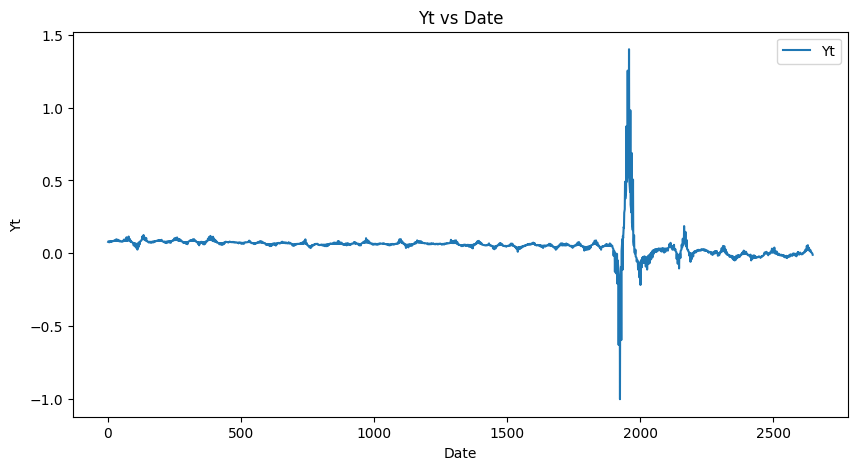

In [89]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 5))

# Plot the data
plt.plot(merged_ADS_df.index, y_pred, label='Yt')

# Add titles and labels
plt.title('Yt vs Date')
plt.xlabel('Date')
plt.ylabel('Yt')

# Add a legend
plt.legend()

# Show the plot
plt.show()


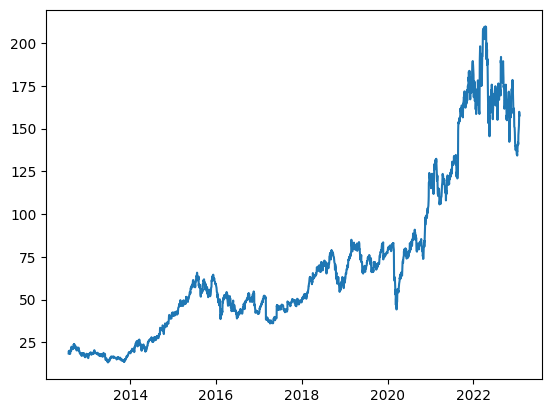

In [74]:
plt.plot(merged_ADS_df['Date'].iloc[1:], merged_ADS_df['Close'].iloc[1:], label='Close')

In [90]:
# Calculate residuals
residuals = merged_ADS_df['Close'].iloc[1:] - y_pred

# Calculate MSE and RMSE
mse = np.mean(residuals ** 2)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 7206.30224529817
RMSE: 84.88994195603017
